[//]: # (Image References)

[image1]: https://user-images.githubusercontent.com/10624937/42135619-d90f2f28-7d12-11e8-8823-82b970a54d7e.gif "Trained Agent"

# Project 1: Navigation

### Introduction

For this project, you will train an agent to navigate (and collect bananas!) in a large, square world.  

![Trained Agent][image1]

A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana.  Thus, the goal of your agent is to collect as many yellow bananas as possible while avoiding blue bananas.  

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  Given this information, the agent has to learn how to best select actions.  Four discrete actions are available, corresponding to:
- **`0`** - move forward.
- **`1`** - move backward.
- **`2`** - turn left.
- **`3`** - turn right.

The task is episodic, and in order to solve the environment, your agent must get an average score of +13 over 100 consecutive episodes.

### Getting Started

1. Download the environment from one of the links below.  You need only select the environment that matches your operating system:
    - Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip)
    - Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip)
    - Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86.zip)
    - Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip)
    
    (_For Windows users_) Check out [this link](https://support.microsoft.com/en-us/help/827218/how-to-determine-whether-a-computer-is-running-a-32-bit-version-or-64) if you need help with determining if your computer is running a 32-bit version or 64-bit version of the Windows operating system.

    (_For AWS_) If you'd like to train the agent on AWS (and have not [enabled a virtual screen](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Training-on-Amazon-Web-Service.md)), then please use [this link](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux_NoVis.zip) to obtain the environment.

2. Place the file in the DRLND GitHub repository, in the `p1_navigation/` folder, and unzip (or decompress) the file. 

### Instructions

Follow the instructions in `Navigation.ipynb` to get started with training your own agent!  

### (Optional) Challenge: Learning from Pixels

After you have successfully completed the project, if you're looking for an additional challenge, you have come to the right place!  In the project, your agent learned from information such as its velocity, along with ray-based perception of objects around its forward direction.  A more challenging task would be to learn directly from pixels!

To solve this harder task, you'll need to download a new Unity environment.  This environment is almost identical to the project environment, where the only difference is that the state is an 84 x 84 RGB image, corresponding to the agent's first-person view.  (**Note**: Udacity students should not submit a project with this new environment.)

You need only select the environment that matches your operating system:
- Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Linux.zip)
- Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana.app.zip)
- Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Windows_x86.zip)
- Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Windows_x86_64.zip)

Then, place the file in the `p1_navigation/` folder in the DRLND GitHub repository, and unzip (or decompress) the file.  Next, open `Navigation_Pixels.ipynb` and follow the instructions to learn how to use the Python API to control the agent.

(_For AWS_) If you'd like to train the agent on AWS, you must follow the instructions to [set up X Server](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Training-on-Amazon-Web-Service.md), and then download the environment for the **Linux** operating system above.

# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [17]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import torch.nn as nn
import time
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)


def dqn(n_episodes=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    starting_time = time.time()        # for timing reasons we notice the starting time
    last_time = starting_time          # time to see how long the last hundred episodes took
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        #state = env.reset()
        score = 0
        done = False
        while not done:
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f} \t Time passed: {:.1f} mins'.format(i_episode, np.mean(scores_window), (time.time() - starting_time)/60.), end="")
        if i_episode % 100 == 0:            
            print('\rEpisode {}\tAverage Score: {:.2f} \tlast 100 Episodes took {:.1f} mins'.format(i_episode, np.mean(scores_window), (time.time() - last_time)/60.))
            last_time = time.time()
        if np.mean(scores_window)>=16.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f} \t Time passed: {:.1f} mins'.format(i_episode-100, np.mean(scores_window), (time.time() - starting_time)/60.))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

Working on device: cpu


In [19]:
env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [20]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Episode 100	Average Score: 0.88 	last 100 Episodes took 1.2 mins
Episode 200	Average Score: 4.10 	last 100 Episodes took 1.1 mins
Episode 300	Average Score: 7.58 	last 100 Episodes took 1.5 mins
Episode 400	Average Score: 10.00 	last 100 Episodes took 1.4 mins
Episode 500	Average Score: 12.54 	last 100 Episodes took 1.5 mins
Episode 600	Average Score: 13.61 	last 100 Episodes took 1.7 mins
Episode 700	Average Score: 15.10 	last 100 Episodes took 1.7 mins
Episode 800	Average Score: 15.44 	last 100 Episodes took 1.7 mins
Episode 884	Average Score: 16.00 	 Time passed: 13.1 mins
Environment solved in 784 episodes!	Average Score: 16.00 	 Time passed: 13.1 mins


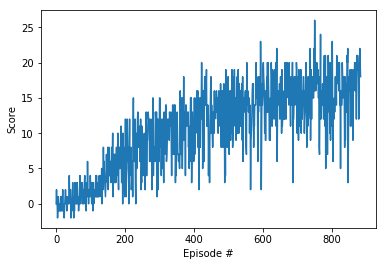

In [21]:
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [22]:
env.close()

### 4. The Performance of a Trained Agent

Now we look at the trained agent

In [29]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [30]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [31]:
# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
# transferlerning from saved state and set to evaluate
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
agent.qnetwork_local.eval()

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                         # initialize the score
done = False
while not done:
    action =  agent.act(state, 0.01)                 # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step

    
print("Score: {}".format(score))


Working on device: cpu
Score: 14.0


In [32]:
env.close()